## Elaborate plotting in Python

### This notebook was made by Jordy van Langen to contribute to a GitHub repository called 'open-visualizations' that contains open science code (e.g., Python, R) for making visualizations based on best open science practices. 
#### February 2020 

In [1]:
#Load libraries

import random as random
from random import seed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

#for rainclouds
import ptitprince as pt
import os
import matplotlib.collections as clt


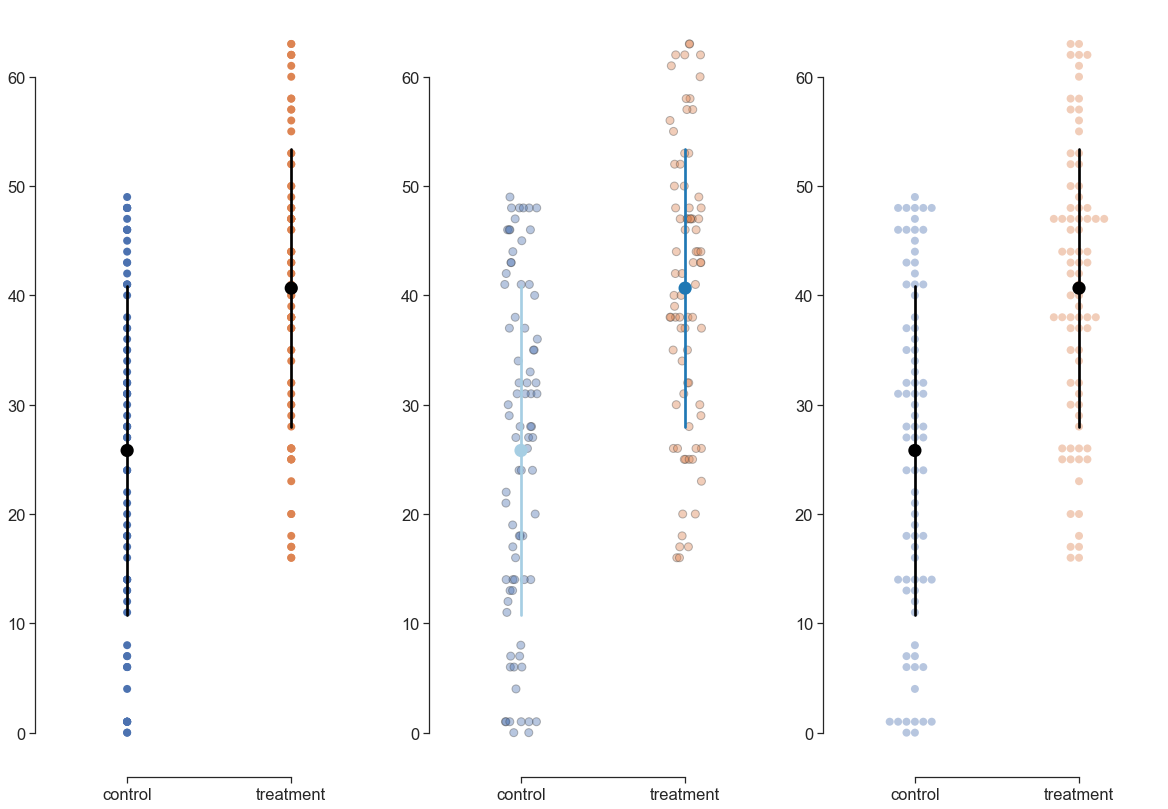

In [2]:
# Create simulated data for control group
random.seed(1)
control = [random.randrange(0,50) for i in range(80)]
# Create simulated data for treatment group
random.seed(2)
treatment = [random.randrange(15,65) for i in range(80)]
# Create dataframe and reshape to use with Seaborn
data = pd.DataFrame({'control': control, 'treatment': treatment})
data_long = pd.melt(data,  value_vars=['control','treatment'])

# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)
# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=data_long, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black', palette = "Paired")
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)

#Plot using swarmplot for subject data
ax2 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=data_long, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(offset=10, trim=True)

In [3]:
#Inspect the dataframe
data

,control,treatment
0,8,18
1,36,20
2,48,20
3,4,38
4,16,25
5,7,62
6,31,57
7,48,34
8,28,31
9,30,53


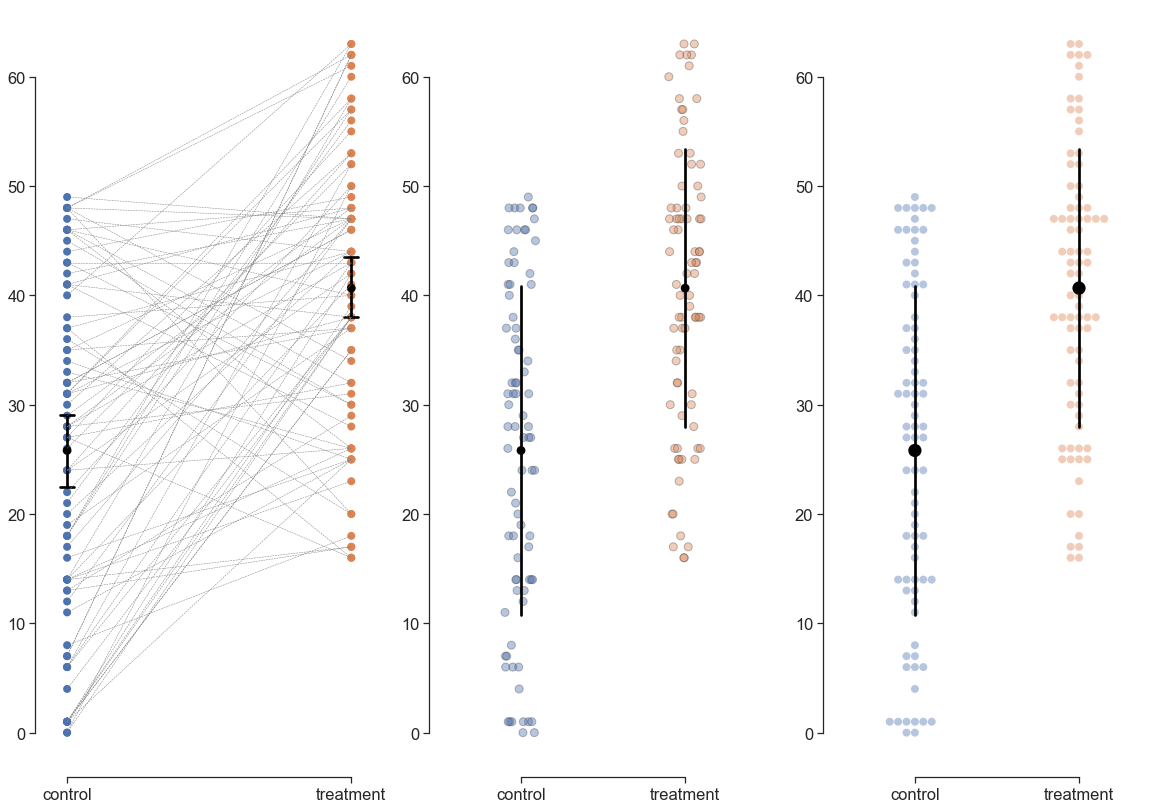

In [4]:
# Create simulated data for control group
random.seed(1)
control = [random.randrange(0,50) for i in range(80)]
# Create simulated data for treatment group
random.seed(2)
treatment = [random.randrange(15,65) for i in range(80)]
# Create dataframe and reshape to use with Seaborn
data = pd.DataFrame({'control': control, 'treatment': treatment})
data_long = pd.melt(data,  value_vars=['control','treatment'])

# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)
#Add lines by manually selecting each value
#plt.plot([8, 18], linewidth=1, color = 'grey')
#plt.plot([36, 20], linewidth=1, color = 'grey')

#However, this can be done automatically with the following code (took 2 hours to find out..)
#plt.plot([data.iloc[:,0], data.iloc[:,1]]) #This gives each line a different color
plt.plot([data.iloc[:,0], data.iloc[:,1]], color = 'grey', linewidth = 0.5, linestyle = '--') #play with these settings (also see: https://matplotlib.org/api/pyplot_api.html)



# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=data_long, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci='sd',data=data_long, join=False, scale=1, zorder=100, color='black') 
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)


#Plot using swarmplot for subject data
ax2 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=data_long, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(offset=10, trim=True)
#plt.savefig('<your directory>', dpi = 400, bbox_inches = 'tight')

How to make a timeseries plot with mean + SE -> wide data format? https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [4]:
from statannot import add_stat_annotation

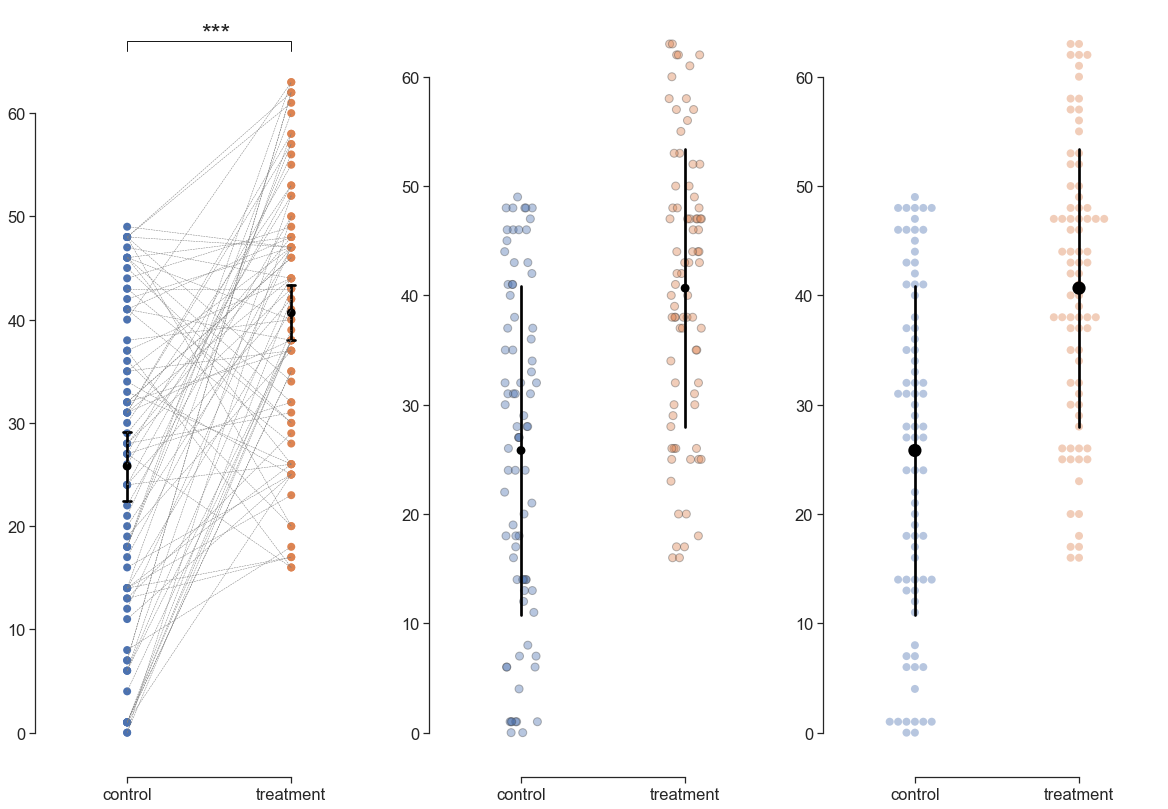

In [22]:

# Create simulated data for control group
random.seed(1)
control = [random.randrange(0,50) for i in range(80)]
# Create simulated data for treatment group
random.seed(2)
treatment = [random.randrange(15,65) for i in range(80)]
# Create dataframe and reshape to use with Seaborn
data = pd.DataFrame({'control': control, 'treatment': treatment})
data_long = pd.melt(data,  value_vars=['control','treatment'])

# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
ax = sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
ax = sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)
#Add lines by manually selecting each value
#plt.plot([8, 18], linewidth=1, color = 'grey')
#plt.plot([36, 20], linewidth=1, color = 'grey')

#However, this can be done automatically with the following code (took 2 hours to find out..)
#plt.plot([data.iloc[:,0], data.iloc[:,1]]) #This gives each line a different color
plt.plot([data.iloc[:,0], data.iloc[:,1]], color = 'grey', linewidth = 0.5, linestyle = '--') #play with these settings (also see: https://matplotlib.org/api/pyplot_api.html)

#Adjust (increase the x-axis limits) to get the points closer to each other
plt.xlim(-0.5,1.5) 

# Add the line below the significance stars
y1 = 66
y2 = 67
x1 = 0
x2 = 1
star_x = "***"
plt.plot([x1,x1, x2, x2],[y1, y2, y2,y1], linewidth=1, color='k')

#Add the stars as a string (for more info https://matplotlib.org/3.1.0/tutorials/text/text_intro.html)
ax1.text(0.45, 67, r'***', fontsize=25)


# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=data_long, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci='sd',data=data_long, join=False, scale=1, zorder=100, color='black') 
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)


#Plot using swarmplot for subject data
ax2 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=data_long, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(offset=10, trim=True)
#plt.savefig('<your directory>', dpi = 400, bbox_inches = 'tight')

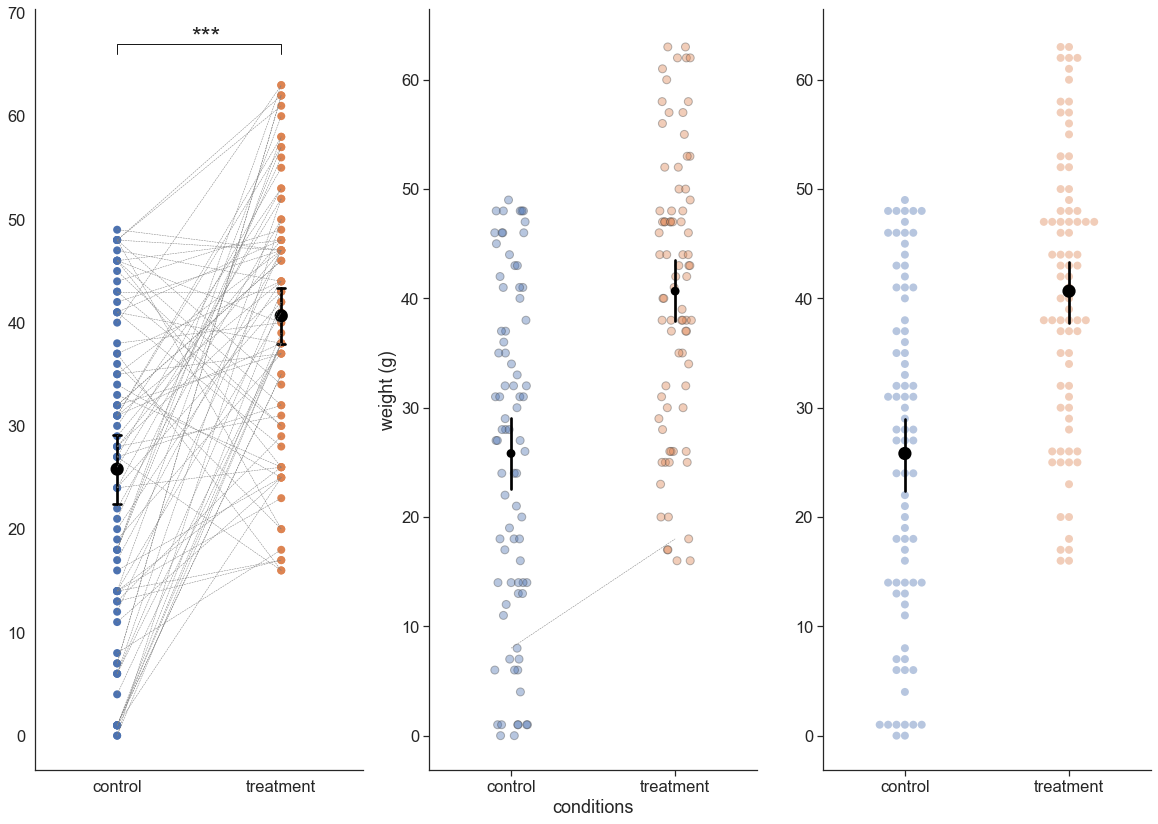

In [23]:
# Create simulated data for control group
random.seed(1)
control = [random.randrange(0,50) for i in range(80)]
# Create simulated data for treatment group
random.seed(2)
treatment = [random.randrange(15,65) for i in range(80)]
# Create dataframe and reshape to use with Seaborn
data = pd.DataFrame({'control': control, 'treatment': treatment})
data_long = pd.melt(data,  value_vars=['control','treatment'])



# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("white")
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
ax = sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
ax = sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(trim=False) #if you want to set the x-axis normal -> remove 'offset=10,' and set trim=False.
#Add lines by manually selecting each value
#plt.plot([8, 18], linewidth=1, color = 'grey')
#plt.plot([36, 20], linewidth=1, color = 'grey')

#However, this can be done automatically with the following code (took 2 hours to find out..)
#plt.plot([data.iloc[:,0], data.iloc[:,1]]) #This gives each line a different color
plt.plot([data.iloc[:,0], data.iloc[:,1]], color = 'grey', linewidth = 0.5, linestyle = '--') #play with these settings (also see: https://matplotlib.org/api/pyplot_api.html)

#Adjust (increase the x-axis limits) to get the points closer to each other
plt.xlim(-0.5,1.5) 

# Add the line below the significance stars
y1 = 66
y2 = 67
x1 = 0
x2 = 1
star_x = "***"
plt.plot([x1,x1, x2, x2],[y1, y2, y2,y1], linewidth=1, color='k')

#Add the stars as a string (for more info https://matplotlib.org/3.1.0/tutorials/text/text_intro.html)
ax1.text(0.45, 67, r'***', fontsize=25)


# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=data_long, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci=95,data=data_long, join=False, scale=1, zorder=100, color='black') 
ax1.set_xlabel('conditions')
ax1.set_ylabel('weight (g)')
sns.despine(trim=False)

plt.plot([data.iloc[0,0], data.iloc[0,1]], color = 'grey', linewidth = 0.5, linestyle = '--')
plt.xlim(-0.5,1.5) 
#Plot using swarmplot for subject data
ax2 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=data_long, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1.5, zorder=100, color='black')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(trim=False)
#plt.savefig('', dpi = 400, bbox_inches = 'tight')

### The code below is based on pupillometry data collected during a pilot test for one of my projects.

In [2]:
#Load data
pupil_df = pd.read_csv('/Users/jordyvanlangen/Desktop/Macintosh HD/Stats_thinking_21/group_statistics_test.csv')
pupil_df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,43.565,42.935,44.038,43.18,43.298,1.6461,2.4466,0.77997,1.7784,2.53
1,43.000,42.000,44.000,41.00,43.298,1.6461,2.4466,0.77997,1.7784,2.53
2,40.000,41.000,41.000,45.00,46.000,0.0000,0.0000,0.00000,0.0000,0.00
3,39.000,49.000,45.000,58.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
4,45.000,43.000,50.000,45.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
5,34.000,42.000,43.500,46.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
6,45.000,42.000,46.500,47.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
7,47.000,45.000,45.500,48.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
8,43.000,43.000,48.500,49.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
9,47.000,42.000,47.000,49.50,0.000,0.0000,0.0000,0.00000,0.0000,0.00


In [3]:
#Give meaningful names to the columns (i.e., variables) 
#This wide dataframe is used for bar plots.
pupil_df.columns = ['Condition 1','Condition 2','Condition 3','Condition 4','shock','sd threat-low','sd threat-high', 'sd safe-low', 'sd safe-high', 'sd shock']
pupil_df

,Condition 1,Condition 2,Condition 3,Condition 4,shock,sd threat-low,sd threat-high,sd safe-low,sd safe-high,sd shock
0,43.565,42.935,44.038,43.18,43.298,1.6461,2.4466,0.77997,1.7784,2.53
1,43.000,42.000,44.000,41.00,43.298,1.6461,2.4466,0.77997,1.7784,2.53
2,40.000,41.000,41.000,45.00,46.000,0.0000,0.0000,0.00000,0.0000,0.00
3,39.000,49.000,45.000,58.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
4,45.000,43.000,50.000,45.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
5,34.000,42.000,43.500,46.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
6,45.000,42.000,46.500,47.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
7,47.000,45.000,45.500,48.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
8,43.000,43.000,48.500,49.00,0.000,0.0000,0.0000,0.00000,0.0000,0.00
9,47.000,42.000,47.000,49.50,0.000,0.0000,0.0000,0.00000,0.0000,0.00


In [4]:
#Merge the dataframe from wide to long for time-course plotting, but also for plotting bar plotting.
pupil_long_df = pd.melt(pupil_df,  value_vars=['Condition 1','Condition 2','Condition 3','Condition 4'])
pupil_long_df

,variable,value
0,Condition 1,43.565
1,Condition 1,43.000
2,Condition 1,40.000
3,Condition 1,39.000
4,Condition 1,45.000
5,Condition 1,34.000
6,Condition 1,45.000
7,Condition 1,47.000
8,Condition 1,43.000
9,Condition 1,47.000


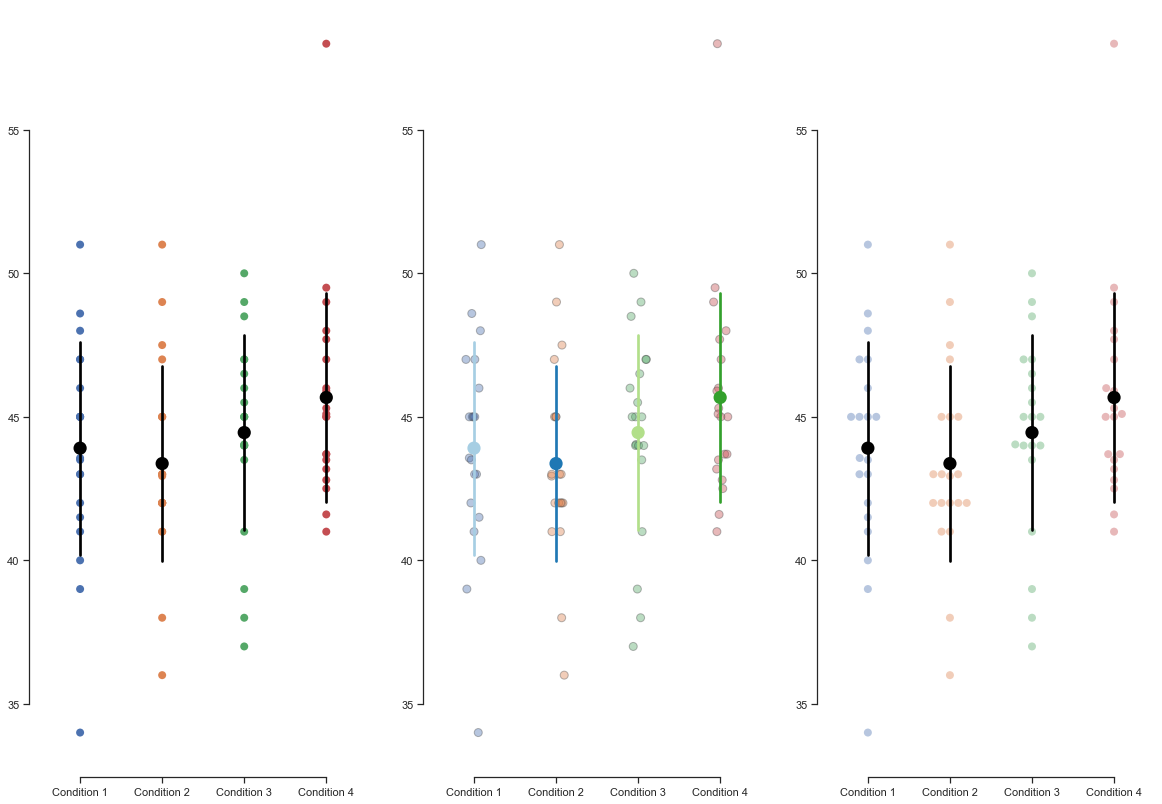

In [7]:
# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1)
sns.set_style("ticks")
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
sns.stripplot(x='variable', y="value", data=pupil_long_df, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=pupil_long_df, join=False, scale=1.5, zorder=100, color='black')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)

# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1)
sns.set_style("ticks")
ax1 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=pupil_long_df, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci='sd', data=pupil_long_df, join=False, scale=1.5, zorder=100, color='black', palette = "Paired")
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.despine(offset=10, trim=True)

#Plot using swarmplot for subject data
ax2 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=pupil_long_df, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci='sd', data=pupil_long_df, join=False, scale=1.5, zorder=100, color='black')
ax2.set_xlabel('')
ax2.set_ylabel('')
sns.despine(offset=10, trim=True)

<Figure size 432x288 with 0 Axes>

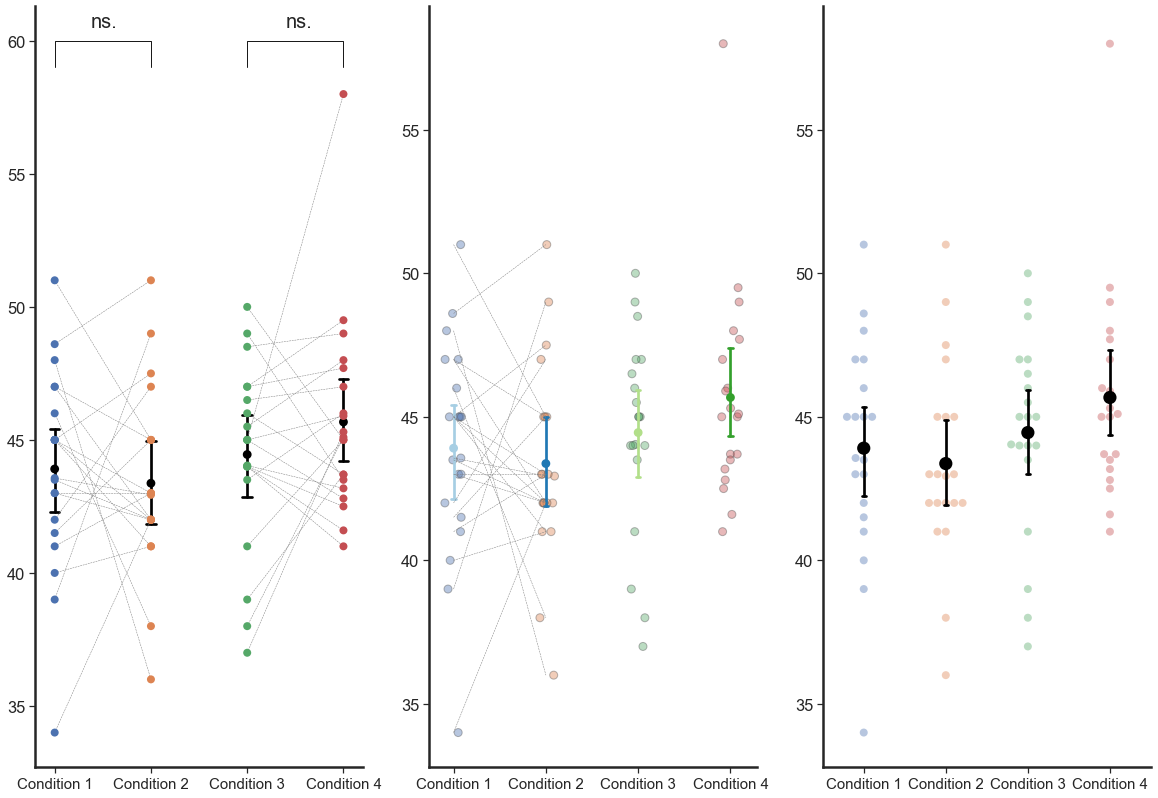

In [8]:
# Plot using stripplot for subject data, no jitter or dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
#sns.set_style("white")
#sns.axes_style("dark")
sns.despine(trim=False)
fig = plt.figure(figsize=(20,14))
ax1 = fig.add_subplot(131)
ax = sns.stripplot(x="variable", y="value", data=pupil_long_df, dodge=False, jitter=False, alpha=1, size=8)
ax = sns.pointplot(x='variable', y='value', ci=95, data=pupil_long_df, join=False, scale=1, zorder=100, color='black', capsize = 0.10) # This computes the default confidence intervals of 95 %.
ax1.set_xlabel('', fontsize = 15)
ax1.set_ylabel('', fontsize = 20)
ax1.xaxis.set_tick_params(labelsize=15)
#ax1.yaxis.set_tick_params(labelsize=10)
#ax1.set_ylim(ymax = 60)

#Alpha of displaying the edges of the figure
ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')
ax.spines['right'].set_lw('0')
ax.spines['top'].set_lw('0')

#ax.spines['left'].set_color('black')
#fig.set_tight_layout(False)
#Add lines by manually selecting each value
#plt.plot([8, 18], linewidth=1, color = 'grey')
#plt.plot([36, 20], linewidth=1, color = 'grey')

#However, this can be done automatically with the following code (took 2 hours to find out..)
#plt.plot([data.iloc[:,0], data.iloc[:,1]]) #This gives each line a different color
lines1 = plt.plot([pupil_df.iloc[:,0], pupil_df.iloc[:,1]], color = 'grey', linewidth = 0.5, linestyle = '--')
#play with these settings (also see: https://matplotlib.org/api/pyplot_api.html)
#lines2 = plt.plot([pupil_df.iloc[:,3], pupil_df.iloc[:,1]], color = 'black', linewidth = 0.5, linestyle = '--') 
#plt.plot([pupil_long_df.iloc[0:20,1], pupil_long_df.iloc[20:40,1]], color = 'grey', linewidth = 0.5, linestyle = '--')
#plt.plot([pupil_long_df.iloc[40:60,1], pupil_long_df.iloc[60:80,1]], color = 'grey', linewidth = 0.5, linestyle = '--')
#Adjust (increase the x-axis limits) to get the points closer to each other
#plt.xlim(0,6) 

# Add the line below the significance stars
y1 = 59
y2 = 60
x1 = 0
x2 = 1
star_x = "***"
plt.plot([x1,x1, x2, x2],[y1, y2, y2,y1], linewidth=1, color='k')

#Add the stars as a string (for more info https://matplotlib.org/3.1.0/tutorials/text/text_intro.html)
ax1.text(0.37, 60.5, r'ns.', fontsize=20)

# Add the line below the significance stars
y3 = 59
y4 = 60
x5 = 2
x6 = 3
star_x = "***"
plt.plot([x5,x5, x6, x6],[y3, y4, y4,y3], linewidth=1, color='k')

#Add the stars as a string (for more info https://matplotlib.org/3.1.0/tutorials/text/text_intro.html)
ax1.text(2.4, 60.5, r'ns.', fontsize=20)

x3 = 2
x4 = 3
lines2 = plt.plot([x3, x4],[pupil_df.iloc[:,2], pupil_df.iloc[:,3]], linewidth = 0.5, color = 'grey', linestyle = '--')

# Plot using stripplot for subject data with jitter and dodge
sns.set(font_scale=1.5)
sns.set_style("ticks")
ax2 = fig.add_subplot(132)
sns.stripplot(x="variable", y="value", data=pupil_long_df, dodge=True, jitter=True, alpha=.40, zorder=1, size=8, linewidth = 1)
sns.pointplot(x='variable', y='value', ci=95,data=pupil_long_df, join=False, scale=1, zorder=100, color='black', capsize = 0.05, palette = 'Paired') 
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.xaxis.set_tick_params(labelsize=15)
#ax2.yaxis.set_tick_params(labelsize=10)

#Alpha of displaying the edges of the figure
ax2.spines['bottom'].set_lw('2.5')
ax2.spines['left'].set_lw('2.5')
ax2.spines['right'].set_lw('0')
ax2.spines['top'].set_lw('0')

sns.despine(trim=False)

#Lines between jittered points
lines3 = plt.plot([pupil_df.iloc[:,0], pupil_df.iloc[:,1]], color = 'grey', linewidth = 0.5, linestyle = '--')
# x7 = 2
# x8 = 3
# lines4 = plt.plot([x7, x8],[pupil_df.iloc[:,2], pupil_df.iloc[:,3]], linewidth = 0.5, color = 'grey', linestyle = '--')


#Plot using swarmplot for subject data
ax3 = fig.add_subplot(133)
sns.swarmplot(x='variable', y="value", data=pupil_long_df, alpha=0.40, zorder=1, size=8)
sns.pointplot(x='variable', y='value', ci=95, data=pupil_long_df, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.xaxis.set_tick_params(labelsize=15)
#ax3.yaxis.set_tick_params(labelsize=10)

#Alpha of displaying the edges of the figure
ax3.spines['bottom'].set_lw('2.5')
ax3.spines['left'].set_lw('2.5')
ax3.spines['right'].set_lw('0')
ax3.spines['top'].set_lw('0')

sns.despine(trim=False)

#Save the figure
#plt.savefig('', dpi = 400, bbox_inches = 'tight')

## Notice that in the middle plot the lines are not connected perfectly, because I don't know how to do this using the Seaborn library. Therefore, I used a different approach, see below.

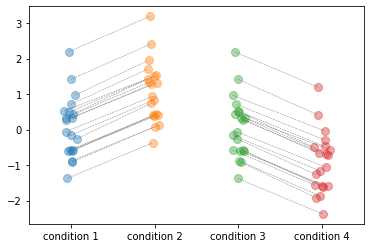

In [34]:
N=20
# dummy dataset
data = np.random.normal(size=(N,))
df = pd.DataFrame({'condition 1': data,
                   'condition 2': data+1,
                   'condition 3': data,
                   'condition 4': data-1})

jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter += np.arange(len(df.columns))

fig, ax = plt.subplots()
for col in df:
    ax.plot(df_x_jitter[col], df[col], 'o', alpha=.40, zorder=1, ms=8, mew=1)
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns)-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_x_jitter.loc[idx,['condition 3','condition 4']], df.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)

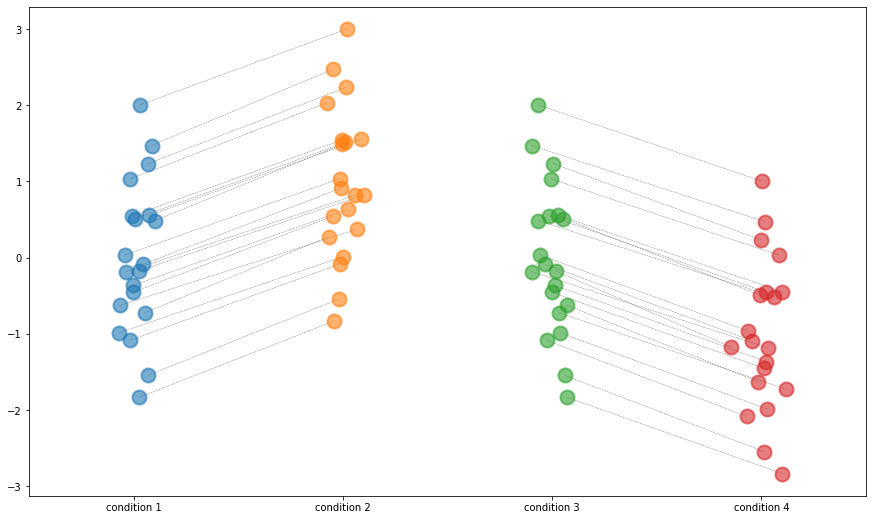

In [35]:
N=20
# dummy dataset
data = np.random.normal(size=(N,))
data

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df = pd.DataFrame({'condition 1': data,
                    'condition 2': data+1,
                    'condition 3': data,
                    'condition 4': data-1})
df

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_x_jitter += np.arange(len(df.columns))
df_x_jitter

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df:
    ax.plot(df_x_jitter[col], df[col], 'o', alpha=.60, zorder=1, ms=14, mew=2)
    
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns)-0.5)

for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_x_jitter.loc[idx,['condition 3','condition 4']], df.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)

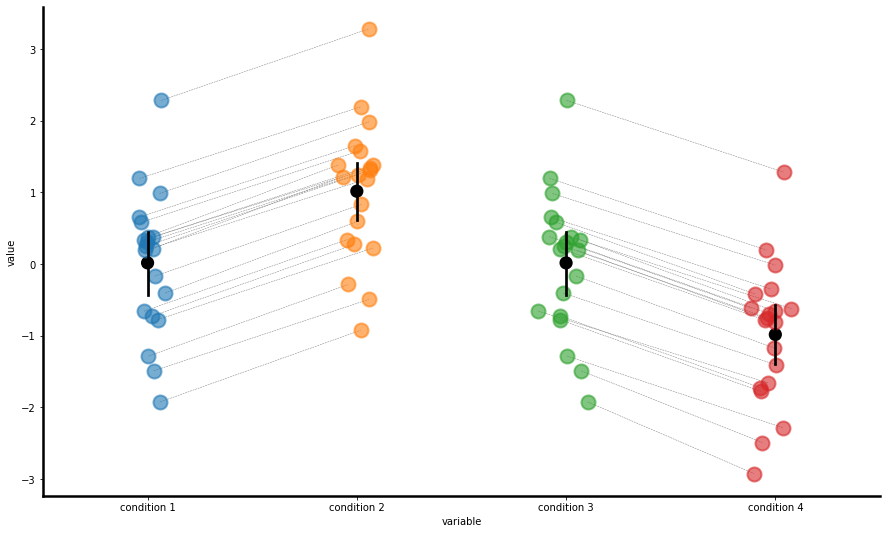

In [36]:
N=20
# dummy dataset
data = np.random.normal(size=(N,))
data

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df = pd.DataFrame({'condition 1': data,
                    'condition 2': data+1,
                    'condition 3': data,
                    'condition 4': data-1})
df

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df.values.shape), columns=df.columns)
df_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_x_jitter += np.arange(len(df.columns))
df_x_jitter

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df:
    ax.plot(df_x_jitter[col], df[col], 'o', alpha=.60, zorder=1, ms=14, mew=2)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05) #Capsize makes plot ugly
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)
ax.set_xlim(-0.5,len(df.columns))
#ax.set_ylim(-3, 4) #This might need to be changed due to random values


ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')
sns.despine(trim=False)
for idx in df.index:
    ax.plot(df_x_jitter.loc[idx,['condition 1','condition 2']], df.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-2)
    ax.plot(df_x_jitter.loc[idx,['condition 3','condition 4']], df.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-2)
    
#Merge dataframe from wide to long for sns.pointplot
df_long = pd.melt(df,  value_vars=['condition 1','condition 2','condition 3','condition 4'])
sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'    

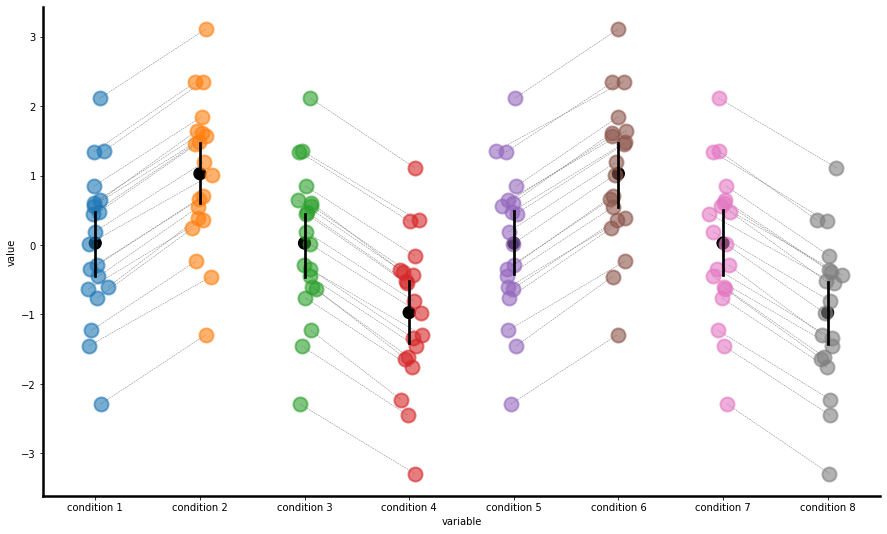

In [37]:
N=20
# dummy dataset
data_2 = np.random.normal(size=(N,))
data_2

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df_2 = pd.DataFrame({'condition 1': data_2,
                    'condition 2': data_2+1,
                    'condition 3': data_2,
                    'condition 4': data_2-1,
                    'condition 5': data_2,
                    'condition 6': data_2+1,
                    'condition 7': data_2,
                    'condition 8': data_2-1})
df_2

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_2_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df_2.values.shape), columns=df_2.columns)
df_2_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_2_x_jitter += np.arange(len(df_2.columns))
df_2_x_jitter

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df_2:
    ax.plot(df_2_x_jitter[col], df_2[col], 'o', alpha=.60, zorder=1, ms=14, mew=2)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long_2, join=False, scale=1.5, zorder=100, color = 'black')

    #sns.set(font_scale=1.5)
    #sns.set_style("ticks")
    #sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
    #sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
    #ax1.set_xlabel('conditions')
    #ax1.set_ylabel('weight (g)') 

ax.set_xticks(range(len(df_2.columns)))
ax.set_xticklabels(df_2.columns)
ax.set_xlim(-0.5,len(df_2.columns))
#ax.set_ylim(-3, 4) #This might need to be changed due to random values

sns.despine(trim=False)
ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')

for idx in df_2.index:
    ax.plot(df_2_x_jitter.loc[idx,['condition 1','condition 2']], df_2.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_2_x_jitter.loc[idx,['condition 3','condition 4']], df_2.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_2_x_jitter.loc[idx,['condition 5','condition 6']], df_2.loc[idx,['condition 5','condition 6']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_2_x_jitter.loc[idx,['condition 7','condition 8']], df_2.loc[idx,['condition 7','condition 8']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    
#Save figure
#plt.savefig('')

#Merge dataframe from wide to long for sns.pointplot
df_2_long = pd.melt(df_2,  value_vars=['condition 1','condition 2','condition 3','condition 4','condition 5', 'condition 6', 'condition 7', 'condition 8'])
sns.pointplot(x='variable', y='value', ci=95, data=df_2_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'   
    

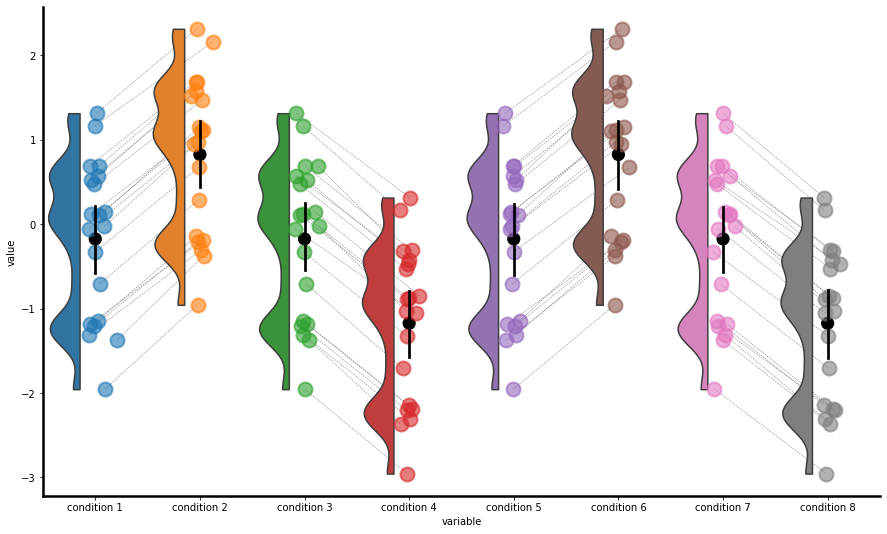

In [38]:
N=20
# dummy dataset
data_3 = np.random.normal(size=(N,))
data_3

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df_3 = pd.DataFrame({'condition 1': data_3,
                    'condition 2': data_3+1,
                    'condition 3': data_3,
                    'condition 4': data_3-1,
                    'condition 5': data_3,
                    'condition 6': data_3+1,
                    'condition 7': data_3,
                    'condition 8': data_3-1})
df_3

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_3_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df_3.values.shape), columns=df_3.columns)
df_3_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_3_x_jitter += np.arange(len(df_3.columns))
df_3_x_jitter

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df_3:
    ax.plot(df_3_x_jitter[col], df_3[col], 'o', alpha=.60, zorder=1, ms=14, mew=2)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long_2, join=False, scale=1.5, zorder=100, color = 'black')

    #sns.set(font_scale=1.5)
    #sns.set_style("ticks")
    #sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
    #sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
    #ax1.set_xlabel('conditions')
    #ax1.set_ylabel('weight (g)') 

ax.set_xticks(range(len(df_3.columns)))
ax.set_xticklabels(df_3.columns)
ax.set_xlim(-0.5,len(df_3.columns))
#ax.set_ylim(-3, 4) #This might need to be changed due to random values

sns.despine(trim=False)
ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')

for idx in df_3.index:
    ax.plot(df_3_x_jitter.loc[idx,['condition 1','condition 2']], df_3.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_3_x_jitter.loc[idx,['condition 3','condition 4']], df_3.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_3_x_jitter.loc[idx,['condition 5','condition 6']], df_3.loc[idx,['condition 5','condition 6']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_3_x_jitter.loc[idx,['condition 7','condition 8']], df_3.loc[idx,['condition 7','condition 8']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    
#Save figure
#plt.savefig('')

#Merge dataframe from wide to long for sns.pointplot
df_3_long = pd.melt(df_3,  value_vars=['condition 1','condition 2','condition 3','condition 4','condition 5', 'condition 6', 'condition 7', 'condition 8'])
sns.pointplot(x='variable', y='value', ci=95, data=df_3_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'   
    

dy="value"; dx="variable"; ort="v"; pal = sns.color_palette(n_colors=1)

ax=pt.half_violinplot( x = dx, y = dy, data = df_3_long, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)

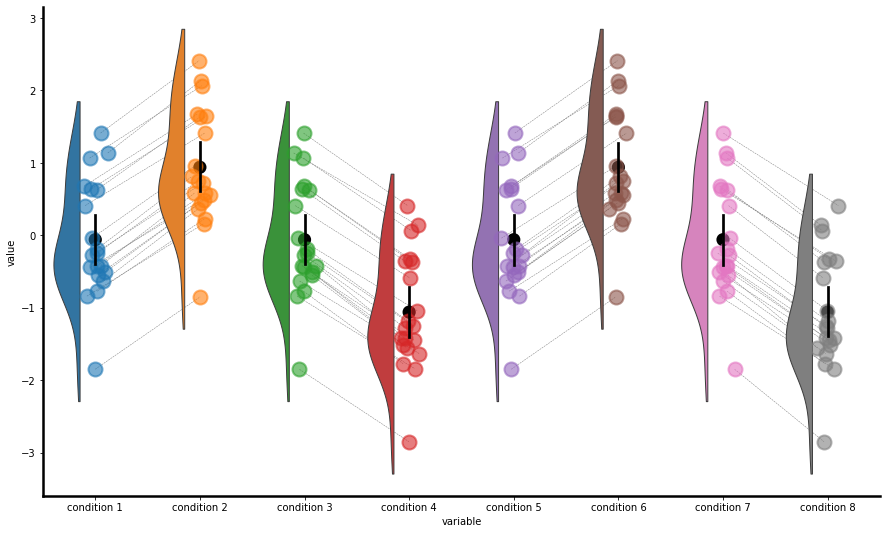

In [43]:
N=20
# dummy dataset
data_4 = np.random.normal(size=(N,))
data_4

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df_4 = pd.DataFrame({'condition 1': data_4,
                    'condition 2': data_4+1,
                    'condition 3': data_4,
                    'condition 4': data_4-1,
                    'condition 5': data_4,
                    'condition 6': data_4+1,
                    'condition 7': data_4,
                    'condition 8': data_4-1})
df_4

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_4_x_jitter = pd.DataFrame(np.random.normal(loc=0, scale=jitter, size=df_4.values.shape), columns=df_4.columns)
df_4_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_4_x_jitter += np.arange(len(df_4.columns))
df_4_x_jitter

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df_4:
    ax.plot(df_4_x_jitter[col], df_4[col], 'o', alpha=.60, zorder=1, ms=14, mew=2)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long_2, join=False, scale=1.5, zorder=100, color = 'black')

    #sns.set(font_scale=1.5)
    #sns.set_style("ticks")
    #sns.stripplot(x="variable", y="value", data=data_long, dodge=False, jitter=False, alpha=1, zorder=1, size=8)
    #sns.pointplot(x='variable', y='value', ci=95, data=data_long, join=False, scale=1, zorder=100, color='black', capsize = 0.05) # This computes the default confidence intervals of 95 %.
    #ax1.set_xlabel('conditions')
    #ax1.set_ylabel('weight (g)') 

ax.set_xticks(range(len(df_4.columns)))
ax.set_xticklabels(df_4.columns)
ax.set_xlim(-0.5,len(df_4.columns))
#ax.set_ylim(-3, 4) #This might need to be changed due to random values

sns.despine(trim=False)
ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')

for idx in df_4.index:
    ax.plot(df_4_x_jitter.loc[idx,['condition 1','condition 2']], df_4.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_4_x_jitter.loc[idx,['condition 3','condition 4']], df_4.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_4_x_jitter.loc[idx,['condition 5','condition 6']], df_4.loc[idx,['condition 5','condition 6']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_4_x_jitter.loc[idx,['condition 7','condition 8']], df_4.loc[idx,['condition 7','condition 8']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    
#Save figure
#plt.savefig('')

#Merge dataframe from wide to long for sns.pointplot
df_4_long = pd.melt(df_4,  value_vars=['condition 1','condition 2','condition 3','condition 4','condition 5', 'condition 6', 'condition 7', 'condition 8'])
sns.pointplot(x='variable', y='value', ci=95, data=df_4_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'   
    

dy="value"; dx="variable"; ort="v"; pal = sns.color_palette(n_colors=1)

# plot violin
test=pt.half_violinplot(data = df_4,bw = "scott",inner = None, scale = "count",
                          width = 0.5, linewidth = 1, cut = 1)

  
#     order=None,
#     hue_order=None,
#     bw='scott',
#     cut=2,
#     scale='area',
#     scale_hue=True,
#     gridsize=100,
#     width=0.8,
#     inner='box',
#     split=False,
#     dodge=True,
#     orient=None,
#     linewidth=None,
#     color=None,
#     palette=None,
#     saturation=0.75,
#     ax=None,
#     offset=0.15,
#ax=pt.RainCloud(x = dx, y = dy, data = df_long, bw = .2,
 #                width_viol = .7, orient = 'v' , alpha = .65, dodge = True)

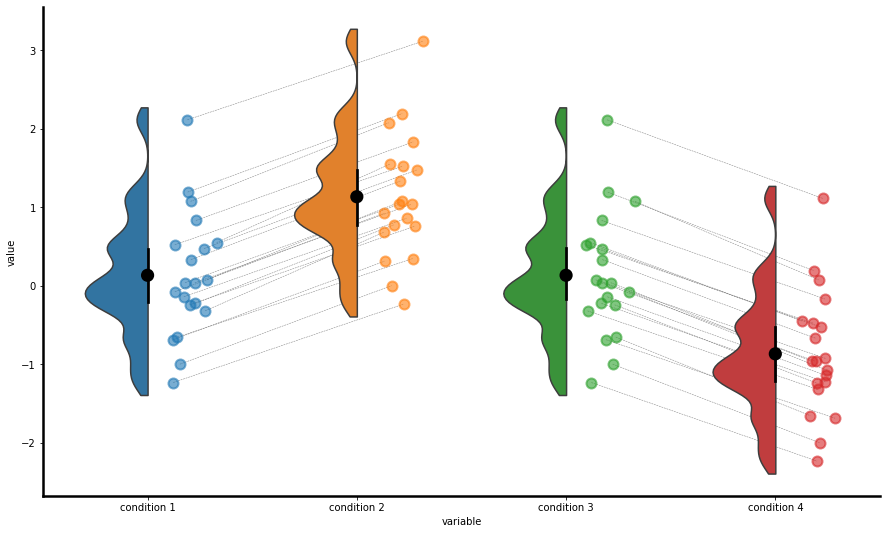

In [44]:
N=20
# dummy dataset
data_5 = np.random.normal(size=(N,))
data_5

#Creates the dataframe in a wide format with condition 1, condition 2, condition 3, condition 4 as columns
df_5 = pd.DataFrame({'condition 1': data_5,
                    'condition 2': data_5+1,
                    'condition 3': data_5,
                    'condition 4': data_5-1})
df_5

#set the amount of jitter and create a dataframe with jittered x-axis values
jitter = 0.05
df_5_x_jitter = pd.DataFrame(np.random.normal(loc=.2, scale=jitter, size=df_5.values.shape), columns=df_5.columns)
df_5_x_jitter

#Do an additional step to create a jittered values for the 4 columns.. i.e., jitter values around condition 1 and 2 + jitter values for condition 3 and 4.
df_5_x_jitter += np.arange(len(df_5.columns))
df_5_x_jitter


#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15,9))
#ax1 = fig.add_subplot(131)
for col in df_5:
    ax.plot(df_5_x_jitter[col], df_5[col], 'o', alpha=.60, zorder=1, ms=10, mew=2)
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black', capsize = 0.05) #Capsize makes plot ugly
    #sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'
ax.set_xticks(range(len(df_5.columns)))
ax.set_xticklabels(df_5.columns)
ax.set_xlim(-0.5, len(df_5.columns))
#ax.set_ylim(-3, 4) #This might need to be changed due to random values


ax.spines['bottom'].set_lw('2.5')
ax.spines['left'].set_lw('2.5')
sns.despine(trim=False)
for idx in df_5.index:
    ax.plot(df_5_x_jitter.loc[idx,['condition 1','condition 2']], df_5.loc[idx,['condition 1','condition 2']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    ax.plot(df_5_x_jitter.loc[idx,['condition 3','condition 4']], df_5.loc[idx,['condition 3','condition 4']], color = 'grey', linewidth = 0.5, linestyle = '--', zorder=-1)
    
#sns.pointplot(x='variable', y='value', ci=95, data=df_long, join=False, scale=1.5, zorder=100, color='black') #palette = 'Paired'   
#Merge dataframe from wide to long for sns.pointplot
df_5_long = pd.melt(df_5,  value_vars=['condition 1','condition 2','condition 3','condition 4'])
dy="value"; dx="variable"; ort="v"; pal = sns.color_palette(n_colors=2)

ax=pt.half_violinplot( x = dx, y = dy, data = df_5_long, bw = .2, cut = 1,
                    scale = "area", width = .6, inner = None, orient = ort, split = False, offset = .0, gridzise = 10) #offset = .0 puts the half-violin on the pointplot
sns.pointplot(x='variable', y='value', ci=95, data=df_5_long, join=False, scale=1.5, zorder=100, color = 'black')

#ax=sns.boxplot( x = dx, y = dy, data = df_5_long, width = .15, zorder = 10,\
  #          showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
   #         showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
     #          saturation = 1, orient = ort, notch = False)



# This is the end of this notebook, but it is still under development to create other figures. 

# From this point I started with experimenting with half-violinplots.

## I found the code below on stackoverflow

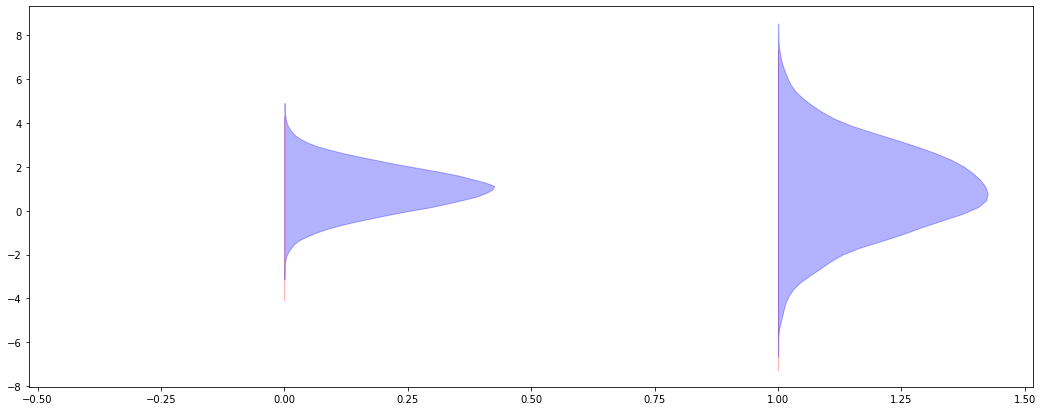

In [94]:
data1 = (np.random.normal(0, 1, size=10000), np.random.normal(0, 2, size=10000))
data2 = (np.random.normal(1, 1, size=10000), np.random.normal(1, 2, size=10000))

f, ax = plt.subplots(figsize=(18, 7))
v1 = ax.violinplot(data1, positions=np.arange(0, len(data1)), widths=0.5,
               showmeans=False, showextrema=False, showmedians=False)
for b in v1['bodies']:
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, -np.inf)
    b.set_color('r')

v2 = ax.violinplot(data2, points=50, positions=np.arange(0, len(data2)), widths=0.85,
                showmeans=False, showextrema=False, showmedians=False)
for b in v2['bodies']:
     m = np.mean(b.get_paths()[0].vertices[:, 0])
     b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, +np.inf)
     b.set_color('b')

done making data
         x         y      z
0     cats -0.979690  False
1    bears  1.199925   True
2   snares -1.087233   True
3    bears -0.771771   True
4    bears -0.003973  False
5     rats  0.352559   True
6    bears -0.756012   True
7    bears -0.832886  False
8     rats  0.584527   True
9    pears  0.657349  False
10    cats -0.430155  False
11   pears -0.440585   True
12    rats  0.396781  False
13    cats -1.399116  False
14    cats -0.856236   True
15    cats  0.118832  False
16  snares -3.001906   True
17   bears -0.378048  False
18  snares  0.645045   True
19   bears  1.689535  False
20    cats -0.757269  False
21    cats  0.112488  False
22  snares  0.537297  False
23  snares -0.506034   True
24    cats  0.100874   True
25    cats -0.197149  False
26   bears  0.119823  False
27    cats  1.269881  False
28   bears  0.406254  False
29  snares  0.095079  False
..     ...       ...    ...
70   bears -1.792691  False
71    cats -0.636156  False
72    cats  0.863247   True
73 

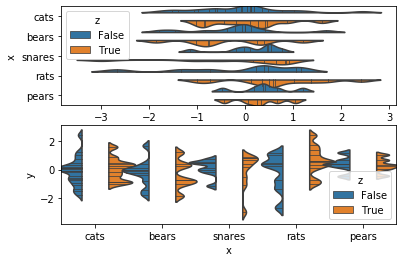

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import seaborn as sns
import pandas as pd

def offset_violinplot_halves(ax, delta, width, inner, direction):
    """
    This function offsets the halves of a violinplot to compare tails
    or to plot something else in between them. This is specifically designed
    for violinplots by Seaborn that use the option `split=True`.

    For lines, this works on the assumption that Seaborn plots everything with
     integers as the center.

    Args:
     <ax>    The axis that contains the violinplots.
     <delta> The amount of space to put between the two halves of the violinplot
     <width> The total width of the violinplot, as passed to sns.violinplot()
     <inner> The type of inner in the seaborn
     <direction> Orientation of violinplot. 'hotizontal' or 'vertical'.

    Returns:
     - NA, modifies the <ax> directly
    """
    # offset stuff
    if inner == 'sticks':
        lines = ax.get_lines()
        for line in lines:
            if direction == 'horizontal':
                data = line.get_ydata()
                print(data)
                if int(data[0] + 1)/int(data[1] + 1) < 1:
                    # type is top, move neg, direction backwards for horizontal
                    data -= delta
                else:
                    # type is bottom, move pos, direction backward for hori
                    data += delta
                line.set_ydata(data)
            elif direction == 'vertical':
                data = line.get_xdata()
                print(data)
                if int(data[0] + 1)/int(data[1] + 1) < 1:
                    # type is left, move neg
                    data -= delta
                else:
                    # type is left, move pos
                    data += delta
                line.set_xdata(data)


    for ii, item in enumerate(ax.collections):
        # axis contains PolyCollections and PathCollections
        if isinstance(item, matplotlib.collections.PolyCollection):
            # get path
            path, = item.get_paths()
            vertices = path.vertices
            half_type = _wedge_dir(vertices, direction)
            # shift x-coordinates of path
            if half_type in ['top','bottom']:
               if inner in ["sticks", None]:
                    if half_type == 'top': # -> up
                        vertices[:,1] -= delta
                    elif half_type == 'bottom': # -> down
                        vertices[:,1] += delta
            elif half_type in ['left', 'right']:
                if inner in ["sticks", None]:
                    if half_type == 'left': # -> left
                        vertices[:,0] -= delta
                    elif half_type == 'right': # -> down
                        vertices[:,0] += delta

def _wedge_dir(vertices, direction):
    """
    Args:
      <vertices>  The vertices from matplotlib.collections.PolyCollection
      <direction> Direction must be 'horizontal' or 'vertical' according to how
                   your plot is laid out.
    Returns:
      - a string in ['top', 'bottom', 'left', 'right'] that determines where the
         half of the violinplot is relative to the center.
    """
    if direction == 'horizontal':
        result = (direction, len(set(vertices[1:5,1])) == 1)
    elif direction == 'vertical':
        result = (direction, len(set(vertices[-3:-1,0])) == 1)
    outcome_key = {('horizontal', True): 'bottom',
                   ('horizontal', False): 'top',
                   ('vertical', True): 'left',
                   ('vertical', False): 'right'}
    # if the first couple x/y values after the start are the same, it
    #  is the input direction. If not, it is the opposite
    return outcome_key[result]

# create some data
n = 100 # number of samples
c = ['cats', 'rats', 'bears', 'pears', 'snares'] # classes
y = np.random.randn(n)
x = np.random.choice(c, size=n)
z = np.random.rand(n) > 0.5 # sub-class
data = pd.DataFrame(dict(x=x, y=y, z=z))
print('done making data')

# initialise new axes;
fig, (ax1, ax2) = plt.subplots(2)

inner = "sticks" # Note: 'box' is default
width = 0.6
delta = 0.20
final_width = width - delta
print(data)
sns.violinplot(data=data, x='y', y='x',
               split=True, hue = 'z',
               ax = ax1, inner='sticks',
               bw = 0.2)
sns.violinplot(data=data, x='x', y='y',
               split=True, hue = 'z',
               ax = ax2, inner='sticks',
               bw = 0.2)

offset_violinplot_halves(ax1, delta, final_width, inner, 'horizontal')
offset_violinplot_halves(ax2, delta, final_width, inner, 'vertical')

plt.show()